In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Car Sales.csv")

In [3]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [4]:
df.shape

(23906, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [6]:
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [7]:
df.dropna(inplace =True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.rename(columns={"Price ($)":"price", "Annual Income":"annual_income", 'Body Style':"body_style", 'Customer Name':'customer_name'}, inplace =True)

In [10]:
df.head()

,Car_id,Date,customer_name,Gender,annual_income,Dealer_Name,Company,Model,Engine,Transmission,Color,price,Dealer_No,body_style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [11]:
#Rearanging the columns
columns_expect_company = [col for col in df.columns if col != 'Company']
new_columns_order = columns_expect_company + ['Company']
df = df[new_columns_order]
df.head()

,Car_id,Date,customer_name,Gender,annual_income,Dealer_Name,Model,Engine,Transmission,Color,price,Dealer_No,body_style,Phone,Dealer_Region,Company
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown,Ford
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora,Dodge
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville,Cadillac
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco,Toyota
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville,Acura


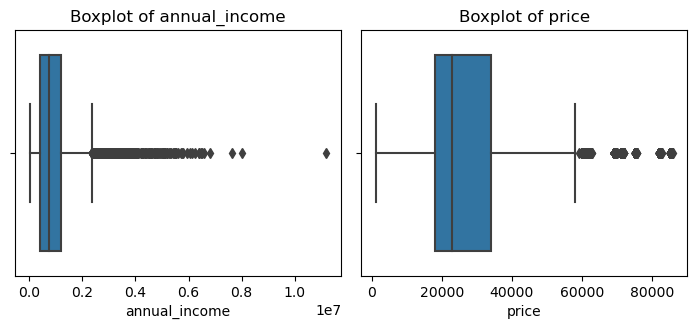

In [12]:
features = ['annual_income', 'price']


plt.figure(figsize=(14, 6))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)  # 2 rows, 3 columns
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [13]:
#def remove_outliers(df, feature):
    #Q1 = df[feature].quantile(0.24)
    #Q3 = df[feature].quantile(0.76)
    #IQR = Q3 - Q1
    #outliers = df[(df[feature] < Q1 - 1.5 * IQR) | (df[feature] > Q3 + 1.5 * IQR)]
    #return outliers

In [14]:
total_sales_by_dealer = df.groupby('Dealer_Name'). agg(total_revenue = ('price',"sum"))

print(total_sales_by_dealer)

                                                 total_revenue
Dealer_Name                                                   
Buddy Storbeck's Diesel Service Inc                   17065223
C & M Motors Inc                                      17569847
Capitol KIA                                           17703134
Chrysler Plymouth                                     17222204
Chrysler of Tri-Cities                                17605055
Classic Chevy                                         17819055
Clay Johnson Auto Sales                               17440649
Diehl Motor CO Inc                                    17468212
Enterprise Rent A Car                                 17695363
Gartner Buick Hyundai Saab                            17739506
Hatfield Volkswagen                                   17519985
Iceberg Rentals                                       17883895
McKinney Dodge Chrysler Jeep                          17413297
Motor Vehicle Branch Office                           1

In [15]:
total_sales_by_dealer.sort_values(by ="total_revenue", ascending =False).total_revenue.nlargest(5)

Dealer_Name
Rabun Used Car Sales                               37456655
Progressive Shippers Cooperative Association No    36751460
U-Haul CO                                          35876089
Race Car Help                                      35288706
Scrivener Performance Engineering                  35258525
Name: total_revenue, dtype: int64

In [16]:
average_car_price = df.groupby('Dealer_Name').agg(average_price= ("price","mean"))

print(average_car_price)

                                                 average_price
Dealer_Name                                                   
Buddy Storbeck's Diesel Service Inc               27217.261563
C & M Motors Inc                                  28111.755200
Capitol KIA                                       28189.703822
Chrysler Plymouth                                 27555.526400
Chrysler of Tri-Cities                            28123.091054
Classic Chevy                                     28602.014446
Clay Johnson Auto Sales                           27816.027113
Diehl Motor CO Inc                                27993.929487
Enterprise Rent A Car                             28312.580800
Gartner Buick Hyundai Saab                        28247.621019
Hatfield Volkswagen                               27853.712242
Iceberg Rentals                                   28522.958533
McKinney Dodge Chrysler Jeep                      27684.096979
Motor Vehicle Branch Office                       27956

In [17]:
average_car_price.sort_values(by= "average_price", ascending = False).average_price.nlargest(5)

Dealer_Name
U-Haul CO                28769.919006
Classic Chevy            28602.014446
Rabun Used Car Sales     28527.536177
Iceberg Rentals          28522.958533
Enterprise Rent A Car    28312.580800
Name: average_price, dtype: float64

In [18]:
gender_distribution = df.groupby('Gender')['Gender'].count()

print(gender_distribution)

#df.Gender.value_counts()

Gender
Female     5108
Male      18797
Name: Gender, dtype: int64


In [19]:
Region_based_customer_dist = df.Dealer_Region.value_counts()
print(Region_based_customer_dist)

Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3129
Middletown    3128
Greenville    3128
Name: count, dtype: int64


In [20]:
avg_revenue = df.groupby('Dealer_Name').agg(average_annual_revenue= ("annual_income","mean"))

print(avg_revenue)

                                                 average_annual_revenue
Dealer_Name                                                            
Buddy Storbeck's Diesel Service Inc                       844444.976077
C & M Motors Inc                                          827927.740800
Capitol KIA                                               839243.366242
Chrysler Plymouth                                         818718.355200
Chrysler of Tri-Cities                                    848838.258786
Classic Chevy                                             801755.393258
Clay Johnson Auto Sales                                   826137.459330
Diehl Motor CO Inc                                        835202.336538
Enterprise Rent A Car                                     846230.000000
Gartner Buick Hyundai Saab                                826340.047771
Hatfield Volkswagen                                       849921.976153
Iceberg Rentals                                           855874

In [21]:
avg_revenue.sort_values(by ='average_annual_revenue', ascending = False).average_annual_revenue.nlargest(5)

Dealer_Name
Iceberg Rentals                                    855874.015949
Suburban Ford                                      850743.425583
Hatfield Volkswagen                                849921.976153
Progressive Shippers Cooperative Association No    849548.278452
Chrysler of Tri-Cities                             848838.258786
Name: average_annual_revenue, dtype: float64

In [22]:
avg_annual_income = df.annual_income.mean()
print("The average income overall:",avg_annual_income.round())

The average income overall: 830847.0


In [23]:
top_5_model = df.Model.value_counts().nlargest(5)
print(top_5_model)

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Jetta         382
Name: count, dtype: int64


In [24]:
highest_sales_company = df.Company.value_counts().nlargest(1)
print(highest_sales_company)

Company
Chevrolet    1819
Name: count, dtype: int64


In [25]:
sales_by_companies = df.Company.value_counts()
sales_by_companies

Company
Chevrolet     1819
Dodge         1670
Ford          1614
Volkswagen    1333
Mercedes-B    1285
Mitsubishi    1277
Chrysler      1120
Oldsmobile    1111
Toyota        1110
Nissan         886
Mercury        874
Lexus          802
Pontiac        796
BMW            790
Volvo          789
Honda          708
Acura          689
Cadillac       652
Plymouth       617
Saturn         586
Lincoln        492
Audi           468
Buick          439
Subaru         405
Jeep           363
Porsche        361
Hyundai        264
Saab           210
Infiniti       195
Jaguar         180
Name: count, dtype: int64

In [26]:
avg_car_price = df.groupby('Company').agg(avg_price_car = ("price","mean"))
avg_car_price.round()
#.average_price_car.nlargest()

,avg_price_car
Company,
Acura,24759.0
Audi,22852.0
BMW,25091.0
Buick,33634.0
Cadillac,40972.0
Chevrolet,26199.0
Chrysler,26020.0
Dodge,26395.0
Ford,29264.0


In [27]:
#Which dealer region has the highest sales revenue

dealer_region_high_sales = df.groupby("Dealer_Region").agg(total_sales = ('price','sum'))
dealer_region_high_sales.sort_values(by = 'total_sales', ascending= False)

,total_sales
Dealer_Region,
Austin,117192531
Janesville,106351234
Scottsdale,95969374
Aurora,88642382
Greenville,88149602
Pasco,88040714
Middletown,87134628


In [28]:
#What is the sales performance comparison between different dealer regions

sales_performance_com =  df.groupby('Dealer_Region').agg(total_sales = ('price','sum'), average_sales = ('price','mean'), number_of_sales = ("Car_id",'count'))
sales_performance_com

,total_sales,average_sales,number_of_sales
Dealer_Region,,,
Aurora,88642382,28329.300735,3129
Austin,117192531,28341.603628,4135
Greenville,88149602,28180.819054,3128
Janesville,106351234,27833.350955,3821
Middletown,87134628,27856.338875,3128
Pasco,88040714,28119.039923,3131
Scottsdale,95969374,27954.958928,3433


In [29]:
#How does the average car price vary across different regions

avg_car_price_region = df.groupby('Dealer_Region').agg(average_price =  ('price','mean'))
avg_car_price_region.round()

,average_price
Dealer_Region,
Aurora,28329.0
Austin,28342.0
Greenville,28181.0
Janesville,27833.0
Middletown,27856.0
Pasco,28119.0
Scottsdale,27955.0


In [30]:
#What is the distribution of engine types among sold cars?
distribution_engine = df.Engine.value_counts()
distribution_engine

Engine
DoubleÂ Overhead Camshaft    12570
Overhead Camshaft            11335
Name: count, dtype: int64

In [31]:
#What percentage of cars sold have automatic vs. manual transmission?

automatic_manual = df.Transmission.value_counts()
total = automatic_manual.sum()

find_percentage = (automatic_manual / total)*100
find_percentage

Transmission
Auto      52.583142
Manual    47.416858
Name: count, dtype: float64

In [32]:
#What are the top 3 most popular car colors
popular_car_color = df.Color.value_counts().nlargest(3)
popular_car_color

Color
Pale White    11255
Black          7857
Red            4793
Name: count, dtype: int64

In [33]:
#What is the distribution of body styles among sold cars?
body_style_dist = df.body_style.value_counts()
body_style_dist

body_style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2970
Name: count, dtype: int64

In [34]:
#What is the total number of sales made by each dealer?
each_dealer = df.groupby("Dealer_Name").agg(total_sales = ("price", 'sum'))
each_dealer.sort_values(by ="total_sales", ascending=False)

,total_sales
Dealer_Name,
Rabun Used Car Sales,37456655
Progressive Shippers Cooperative Association No,36751460
U-Haul CO,35876089
Race Car Help,35288706
Scrivener Performance Engineering,35258525
Saab-Belle Dodge,35220865
Star Enterprises Inc,35113206
Tri-State Mack Inc,35091357
Suburban Ford,34943473


In [35]:
#Which dealer has the highest average sales price
each_dealer_avg= df.groupby("Dealer_Name").agg(avg_Sales = ("price", 'mean'))
each_dealer_avg.sort_values(by ="avg_Sales", ascending=False)

,avg_Sales
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Capitol KIA,28189.703822
Saab-Belle Dodge,28176.692000
